# Logistic Regresion Pure 
# By : Nguyễn Văn Mạnh - Lớp 20T1 - MSSV : 102200024 

Accuracy: 0.9333333333333333
Recall: 1.0
F1-score: 0.9411764705882353


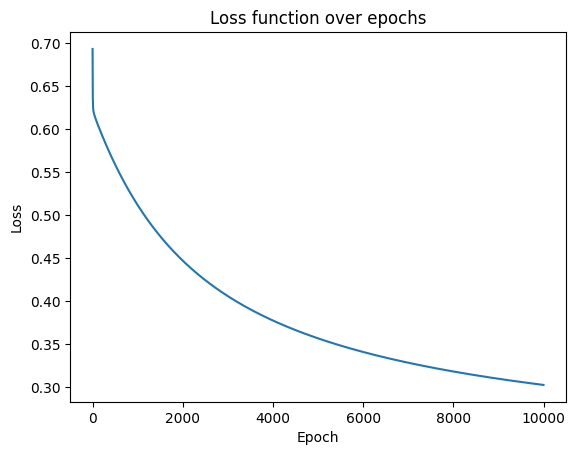

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
def train_test_split(X, y, train_ratio=0.7):
    m = len(X)
    train_size = int(train_ratio * m)
    indices = np.random.permutation(m)
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    return X_train, y_train, X_test, y_test

# Hàm sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hàm loss binary crossentropy
def binary_crossentropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Huấn luyện mô hình bằng gradient descent
def logistic_regression(X, y, lr=0.01, epochs=10000, epsilon=1e-6):
    m, n = X.shape
    w = np.zeros((n, 1))
    losses = []  # List để lưu giá trị loss function qua các epoch
    for epoch in range(epochs):
        z = np.dot(X, w)
        y_pred = sigmoid(z)
        loss = binary_crossentropy(y, y_pred)
        losses.append(loss)
        gradient = np.dot(X.T, (y_pred - y)) / m
        w -= lr * gradient
        if np.linalg.norm(gradient) < epsilon:
            break
    return w, losses

# Dự đoán và tính các độ đo chất lượng mô hình
def evaluate_model(X, y, w):
    y_pred = sigmoid(np.dot(X, w))
    y_pred_labels = (y_pred > 0.5).astype(int)
    accuracy = np.mean(y_pred_labels == y)
    TP = np.sum((y_pred_labels == 1) & (y == 1))
    FN = np.sum((y_pred_labels == 0) & (y == 1))
    FP = np.sum((y_pred_labels == 1) & (y == 0))
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return accuracy, recall, f1_score

# Đọc dữ liệu từ file
data = pd.read_csv('data_logistic.csv').values
N, d = data.shape
X = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)
X = np.hstack((np.ones((N, 1)), X)) # thêm cột 1 vào cho X 

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, y_train, X_test, y_test = train_test_split(X, y)

# Huấn luyện mô hình
w, losses = logistic_regression(X, y)

# Đánh giá mô hình trên tập kiểm tra
accuracy, recall, f1_score = evaluate_model(X_test, y_test, w)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-score:", f1_score)

# Vẽ biểu đồ hàm loss function qua các epoch
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss function over epochs')
plt.show()

Text(0, 0.5, 'Sleep Time (năm)')

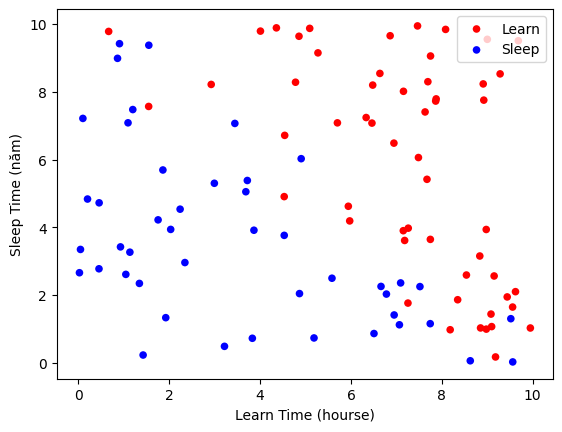

In [5]:
# Load data từ file csv
data = pd.read_csv('data_logistic.csv').values
N, d = data.shape
x = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)

# Vẽ data bằng scatter
x_learn = x[y[:,0]==1]
x_sleep = x[y[:,0]==0]

plt.scatter(x_learn[:, 0], x_learn[:, 1], c='red', edgecolors='none', s=30, label='Learn')
plt.scatter(x_sleep[:, 0], x_sleep[:, 1], c='blue', edgecolors='none', s=30, label='Sleep')
plt.legend(loc=1)
plt.xlabel('Learn Time (hourse)')
plt.ylabel('Sleep Time (năm)')

In [5]:
# Tính giá trị đầu vào cho mô hình logistic regression
learn_time , sleep_time = 6 , 4
X_new = np.array([[1, learn_time, sleep_time]])

# Dự đoán kết quả sử dụng mô hình đã huấn luyện
y_pred = sigmoid(np.dot(X_new, w))
print(y_pred)

# Kiểm tra kết quả dự đoán
if y_pred > 0.5:
    print("Bạn có thể qua.")
else:
    print("Bạn không thể qua.")


[[0.59147665]]
Bạn có thể qua.


# Logistic Regresion (Sử dụng thư viện)

Accuracy: 0.9666666666666667
Recall: 1.0
F1-score: 0.967741935483871


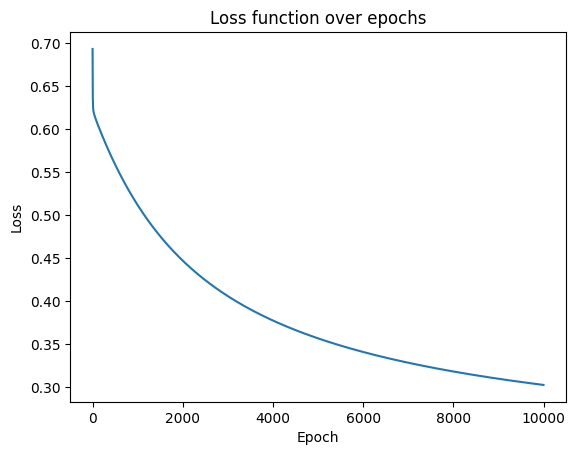

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Đọc dữ liệu từ file
data = pd.read_csv('data_logistic.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình
model = LogisticRegression()
model.fit(X_train, y_train)

# Đánh giá mô hình trên tập kiểm tra
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-score:", f1)

# Vẽ biểu đồ hàm loss function qua các epoch
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss function over epochs')
plt.show()
